# 01_eda.ipynb  
**Objetivo**: Explorar el dataset de startups para conocer distribuciones, nulos y correlaciones.  
**Datos**: columnas, tipos y variable objetivo (`status`).

In [19]:
from pathlib import Path
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import de constantes (asegúrate de pip install -e . en tu venv)
from src.config import RAW_DATA_FILE, FIGURES_DIR, TARGET_COLUMN

# preparar folder de figuras
fig_dir = FIGURES_DIR / 'eda'
fig_dir.mkdir(parents=True, exist_ok=True)

# Cargar datos
df = pd.read_csv(RAW_DATA_FILE)

In [20]:
display(df.head())

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [22]:
# Información general del dataset
print("Información del dataset:")
display(df.info())
print("\nEstadísticas descriptivas:")
display(df.describe())
print("\nValores nulos por columna:")
nulls = df.isnull().sum()
display(nulls[nulls>0])

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null  

None


Estadísticas descriptivas:


,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,...,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
count,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,771.000000,771.000000,923.000000,923.000000,...,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,572.297941,38.517442,-103.539212,0.646804,2.235630,3.931456,3.055353,4.754423,7.710726,2.310943,...,0.003250,0.322860,0.326111,0.254605,0.508126,0.392199,0.232936,0.099675,2.838586,0.809317
std,333.585431,3.741497,22.394167,0.478222,2.510449,2.967910,2.977057,3.212107,7.265776,1.390922,...,0.056949,0.467823,0.469042,0.435875,0.500205,0.488505,0.422931,0.299729,1.874601,0.393052
min,1.000000,25.752358,-122.756956,0.000000,-9.046600,-9.046600,-14.169900,-7.005500,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,283.500000,37.388869,-122.198732,0.000000,0.576700,1.669850,1.000000,2.411000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000
50%,577.000000,37.779281,-118.374037,1.000000,1.446600,3.528800,2.520500,4.476700,5.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000
75%,866.500000,40.730646,-77.214731,1.000000,3.575350,5.560250,4.686300,6.753400,10.000000,3.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.800000,1.000000
max,1153.000000,59.335232,18.057121,1.000000,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000



Valores nulos por columna:


Unnamed: 6                  493
closed_at                   588
age_first_milestone_year    152
age_last_milestone_year     152
state_code.1                  1
dtype: int64

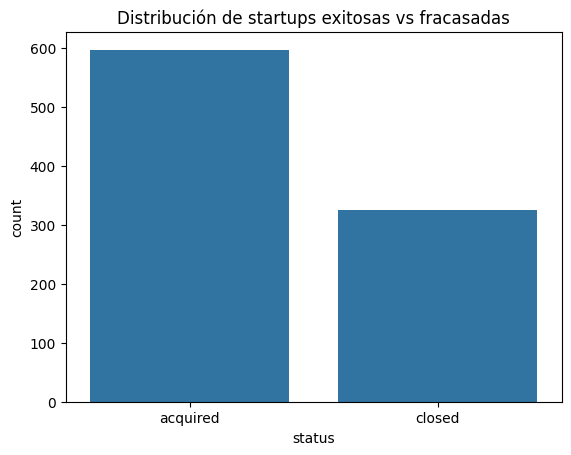

In [23]:
sns.countplot(x=TARGET_COLUMN, data=df)
plt.title('Distribución de startups exitosas vs fracasadas')
plt.savefig(fig_dir/'target_distribution.png')
plt.show()

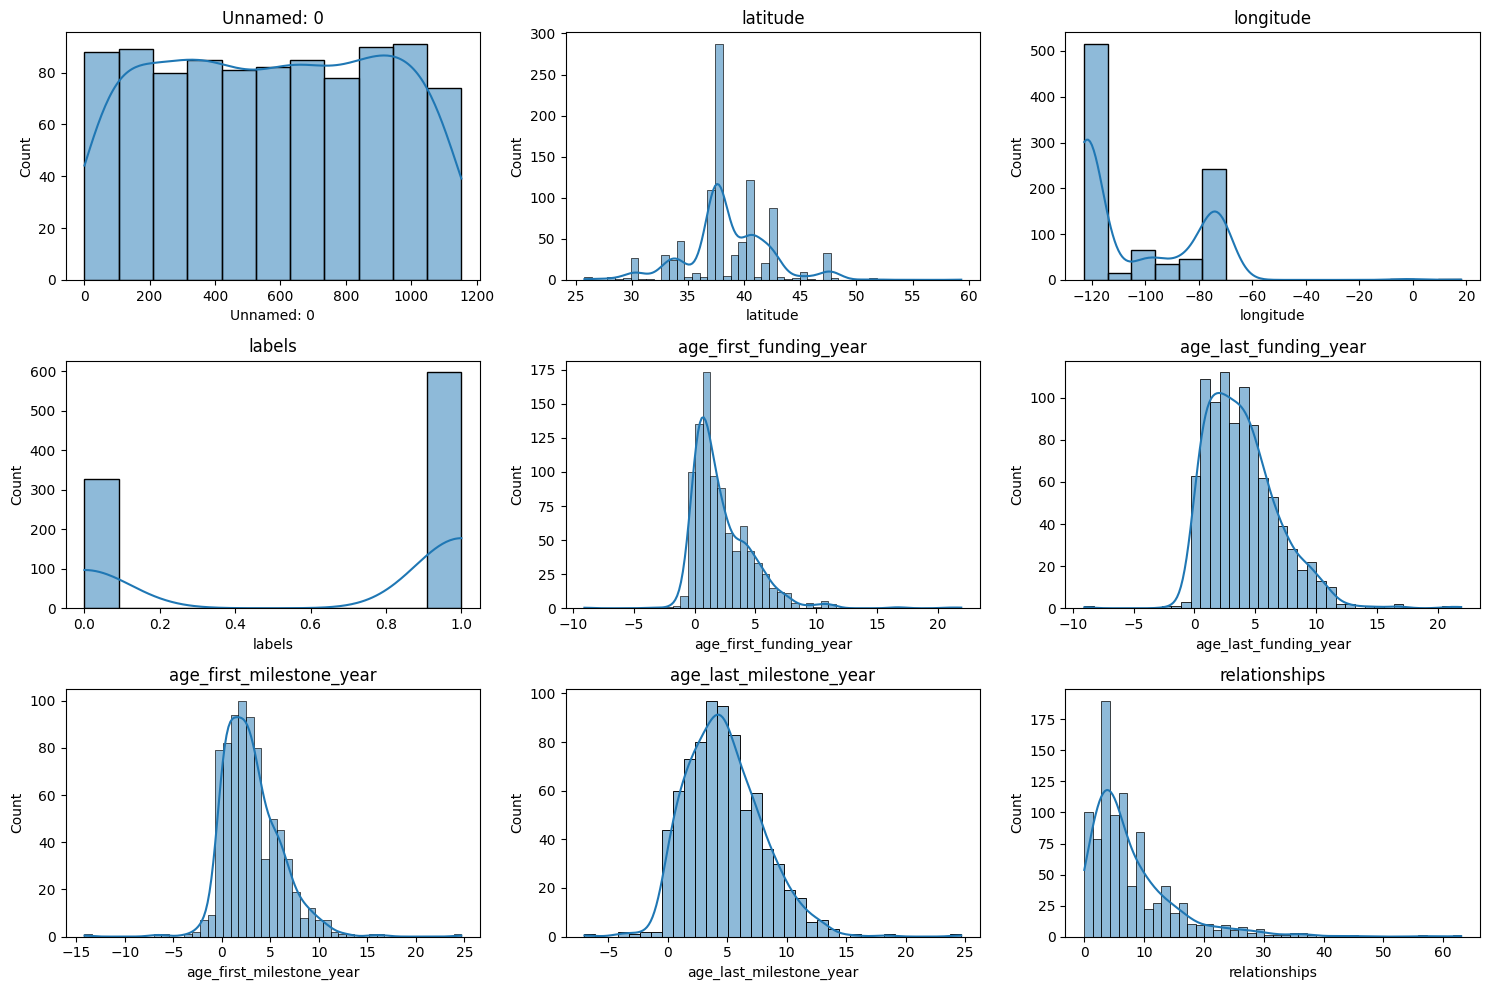

In [24]:
num_cols = df.select_dtypes('number').columns
fig, axes = plt.subplots(3,3, figsize=(15,10))
for ax, col in zip(axes.flatten(), num_cols[:9]):
    sns.histplot(df[col], kde=True, ax=ax)
    ax.set_title(col)
fig.tight_layout()
fig.savefig(fig_dir/'numeric_distributions.png')
plt.show()

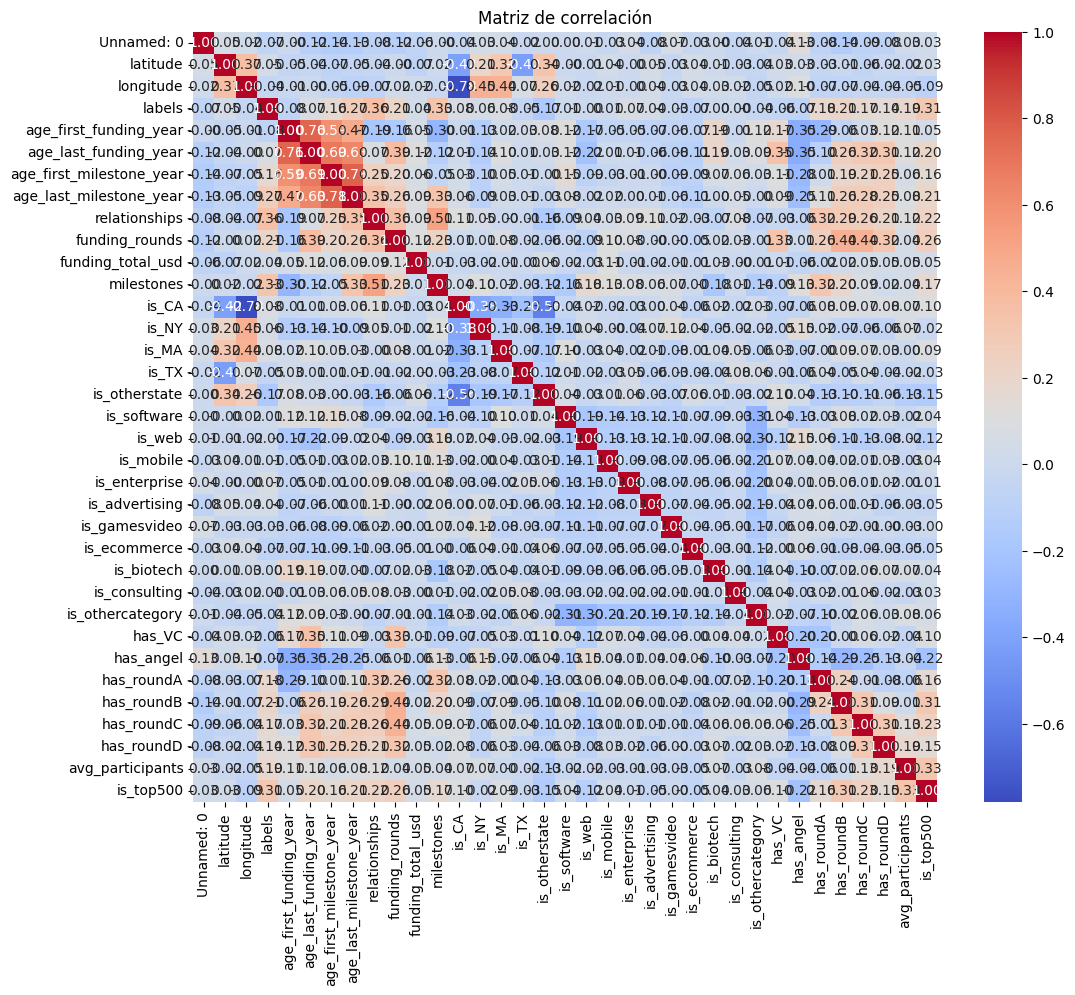

In [25]:
corr = df.select_dtypes('number').corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación')
plt.savefig(fig_dir/'correlation_matrix.png')
plt.show()

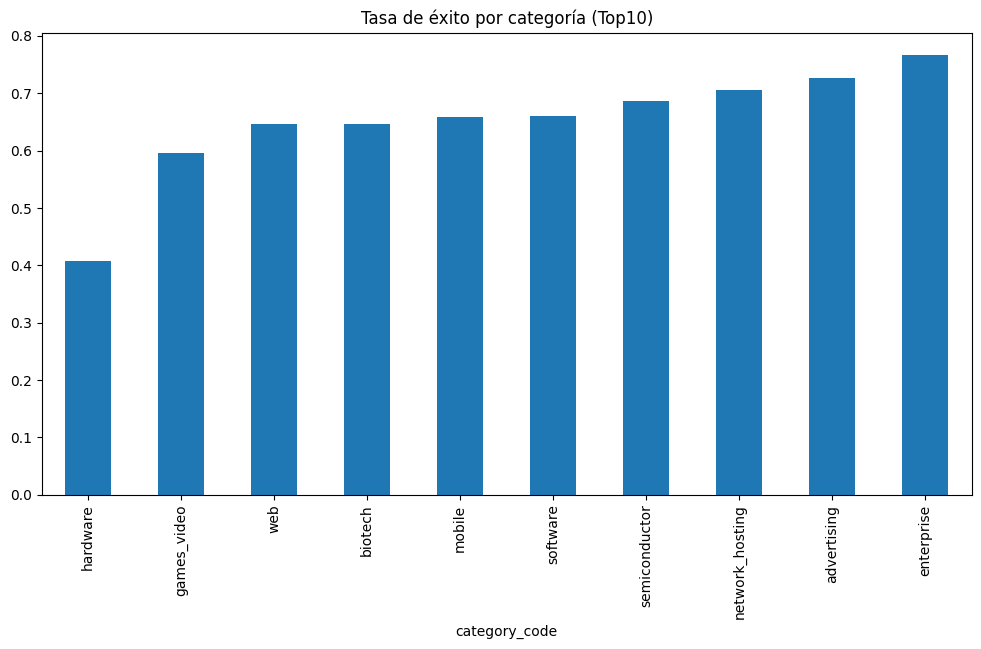

In [26]:
if 'category_code' in df.columns:
    top10 = df['category_code'].value_counts().head(10).index
    rates = (
        df[df['category_code'].isin(top10)]
        .groupby(['category_code', TARGET_COLUMN])
        .size()
        .unstack()
        .pipe(lambda d: d.div(d.sum(1),0))
    )
    rates['acquired'].sort_values().plot.bar(figsize=(12,6))
    plt.title('Tasa de éxito por categoría (Top10)')
    plt.savefig(fig_dir/'success_by_category.png')
    plt.show()

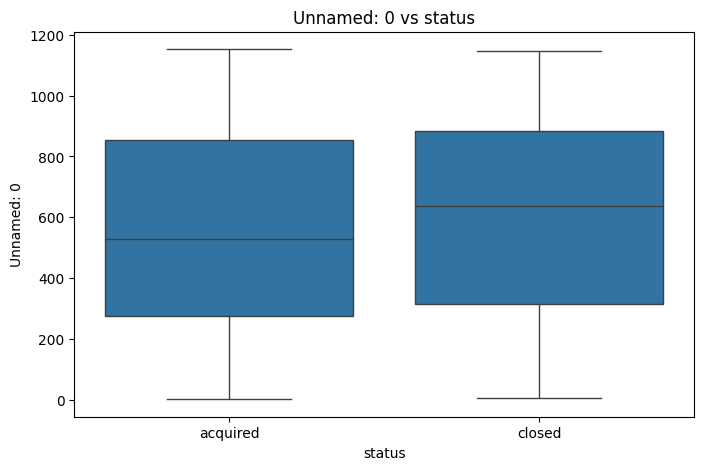

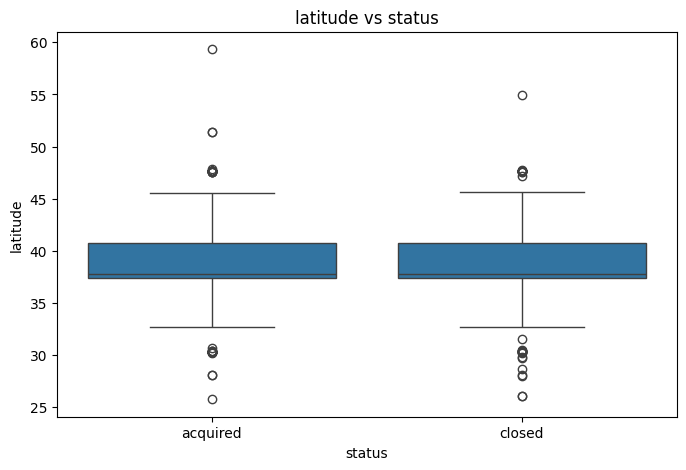

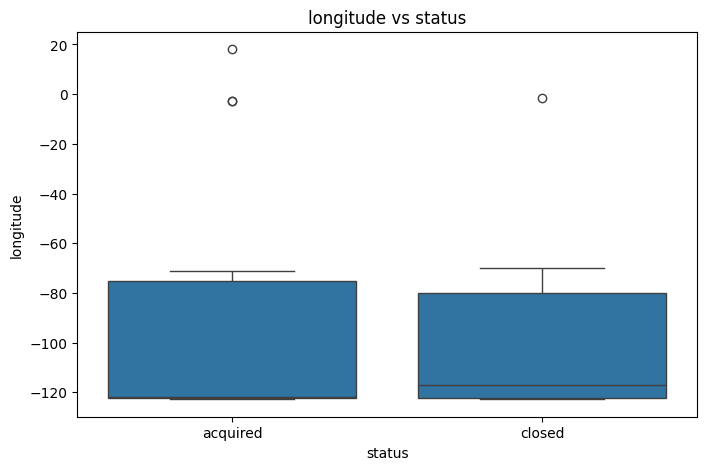

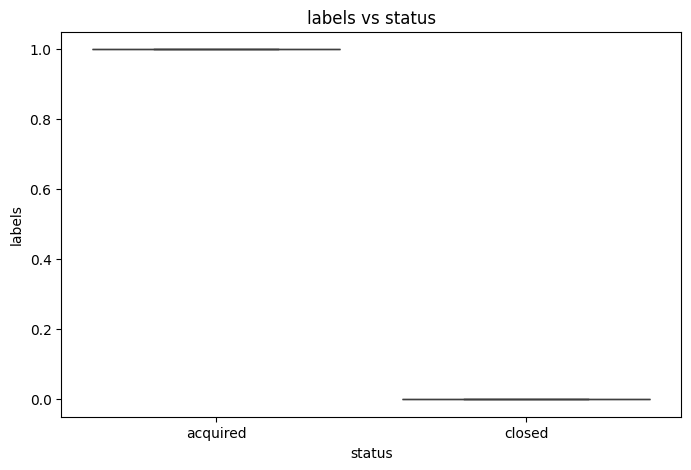

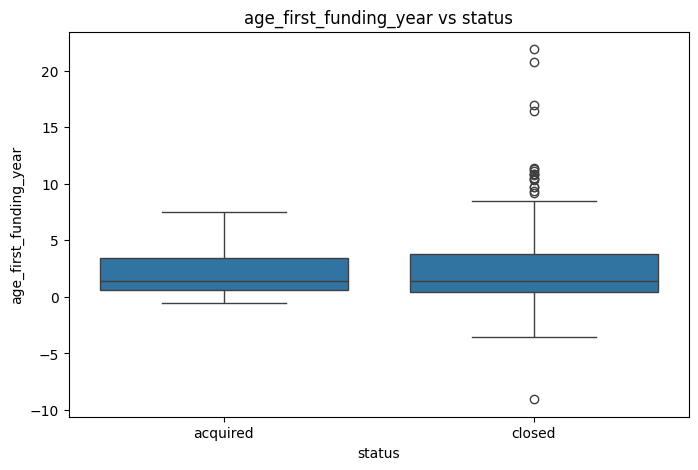

In [27]:
for col in num_cols[:5]:
    plt.figure(figsize=(8,5))
    sns.boxplot(x=TARGET_COLUMN, y=col, data=df)
    plt.title(f'{col} vs {TARGET_COLUMN}')
    plt.savefig(fig_dir/f'{col}_vs_target.png')
    plt.show()